In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df=pd.read_csv("globalterrorism.csv",encoding="latin1")

<ipython-input-26-50133f81f4d1>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("globalterrorism.csv",encoding="latin1")


In [27]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137309,201409020052,2014,9,2,NaN,0,NaN,153,Pakistan,6,...,NaN,"""Updated: Four killed, five injured in Karachi...",NaN,NaN,START Primary Collection,-9.0,-9.0,0.0,-9.0,NaN
137310,201409020054,2014,9,2,NaN,0,NaN,214,Ukraine,9,...,NaN,"""Ukraine says cross-border shelling increases,...","""'Terrorists' in Russian uniform fire on Ukrai...",NaN,START Primary Collection,-9.0,-9.0,0.0,-9.0,NaN
137311,201409020059,2014,9,2,NaN,0,NaN,147,Nigeria,11,...,NaN,"""Unknown Gunmen kill Magistrate in Enugu,"" Thi...",NaN,NaN,START Primary Collection,-9.0,-9.0,0.0,-9.0,NaN
137312,201409030001,2014,9,3,NaN,0,NaN,113,Libya,10,...,NaN,"""SOCAFRICA: Libya Incident Tracker: 30 August ...",NaN,NaN,START Primary Collection,-9.0,-9.0,0.0,-9.0,NaN


In [28]:
print("There are {} rows and {} columns in the dataset".format(df.shape[0],df.shape[1]))

There are 137314 rows and 135 columns in the dataset


In [29]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [30]:
cols=df.columns.nunique()
print("Total number of columns in the data %d"%cols)

Total number of columns in the data 135


In [50]:
df=df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                             'provstate':'State','city':'City','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                             'targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_type'})

In [51]:
df

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137309,201409020052,2014,9,2,NaN,0,NaN,153,Pakistan,6,...,NaN,"""Updated: Four killed, five injured in Karachi...",NaN,NaN,START Primary Collection,-9.0,-9.0,0.0,-9.0,NaN
137310,201409020054,2014,9,2,NaN,0,NaN,214,Ukraine,9,...,NaN,"""Ukraine says cross-border shelling increases,...","""'Terrorists' in Russian uniform fire on Ukrai...",NaN,START Primary Collection,-9.0,-9.0,0.0,-9.0,NaN
137311,201409020059,2014,9,2,NaN,0,NaN,147,Nigeria,11,...,NaN,"""Unknown Gunmen kill Magistrate in Enugu,"" Thi...",NaN,NaN,START Primary Collection,-9.0,-9.0,0.0,-9.0,NaN
137312,201409030001,2014,9,3,NaN,0,NaN,113,Libya,10,...,NaN,"""SOCAFRICA: Libya Incident Tracker: 30 August ...",NaN,NaN,START Primary Collection,-9.0,-9.0,0.0,-9.0,NaN


In [118]:
df=df[['Year','Month','Day','Country','Region','State','City','Attack_type','Target_type','Target_subtype','Gang_name','Weapon_type']]

In [119]:
df

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...
137309,2014,9,2,Pakistan,South Asia,Sindh,Karachi,Armed Assault,Private Citizens & Property,Religion Identified,Unknown,Firearms
137310,2014,9,2,Ukraine,Eastern Europe,Luhansk,Pobyeda,Bombing/Explosion,Military,"Military Personnel (soldiers, troops, officers...",Unknown,Explosives
137311,2014,9,2,Nigeria,Sub-Saharan Africa,Enugu,Enugu,Assassination,Government (General),Judge/Attorney/Court,Unknown,Firearms
137312,2014,9,3,Libya,Middle East & North Africa,Tripoli,Tripoli,Bombing/Explosion,Private Citizens & Property,House/Apartment/Residence,Unknown,Explosives


In [120]:
df['Target_subtype'] = df['Target_subtype'].fillna('others')

In [121]:
df['State']=df['State'].fillna('unknown')

In [122]:
df['City']=df['City'].fillna('unknown')

In [123]:
df.replace( {"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)": "Vehicle"},inplace = True)

In [124]:
df

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...
137309,2014,9,2,Pakistan,South Asia,Sindh,Karachi,Armed Assault,Private Citizens & Property,Religion Identified,Unknown,Firearms
137310,2014,9,2,Ukraine,Eastern Europe,Luhansk,Pobyeda,Bombing/Explosion,Military,"Military Personnel (soldiers, troops, officers...",Unknown,Explosives
137311,2014,9,2,Nigeria,Sub-Saharan Africa,Enugu,Enugu,Assassination,Government (General),Judge/Attorney/Court,Unknown,Firearms
137312,2014,9,3,Libya,Middle East & North Africa,Tripoli,Tripoli,Bombing/Explosion,Private Citizens & Property,House/Apartment/Residence,Unknown,Explosives


In [116]:
df.shape

(137314, 12)

In [115]:
df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
State             0
City              0
Attack_type       0
Target_type       0
Target_subtype    0
Gang_name         1
Weapon_type       1
dtype: int64

In [80]:
df.head(10)

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
5,1970,1,1,United States,North America,Illinois,Cairo,Armed Assault,Police,"Police Building (headquarters, station, school)",Black Nationalists,Firearms
6,1970,1,2,Uruguay,South America,Montevideo,Montevideo,Assassination,Police,Police Security Forces/Officers,Tupamaros (Uruguay),Firearms
7,1970,1,2,United States,North America,California,Oakland,Bombing/Explosion,Utilities,Electricity,Unknown,Explosives
8,1970,1,2,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,New Year's Gang,Incendiary
9,1970,1,3,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,New Year's Gang,Incendiary


In [81]:
df.columns.unique()

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Attack_type', 'Target_type', 'Target_subtype', 'Gang_name',
       'Weapon_type'],
      dtype='object')

In [113]:
df.columns.nunique()

12

In [114]:
Countries=df['Country'].nunique()
print("The total number of countries are %d"%Countries)

The total number of countries are 205


In [94]:
print(df['Region'].unique())

['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia']


In [95]:
print(df['Attack_type'].unique())

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']


In [96]:
print(df['Target_type'].unique())

['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']


In [97]:
print(df['Gang_name'].unique())

['MANO-D' '23rd of September Communist League' 'Unknown' ...
 'Proletarian Solidarity' 'Al-Jihad (Pakistan)' nan]


In [98]:
print(df['Gang_name'].nunique())

3184


In [99]:
print(df['Weapon_type'].unique())

['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment' 'Vehicle' 'Fake Weapons' 'Radiological' 'Other'
 'Biological' nan]


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137314 entries, 0 to 137313
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Year            137314 non-null  int64 
 1   Month           137314 non-null  int64 
 2   Day             137314 non-null  int64 
 3   Country         137314 non-null  object
 4   Region          137314 non-null  object
 5   State           137314 non-null  object
 6   City            137314 non-null  object
 7   Attack_type     137314 non-null  object
 8   Target_type     137314 non-null  object
 9   Target_subtype  137314 non-null  object
 10  Gang_name       137313 non-null  object
 11  Weapon_type     137313 non-null  object
dtypes: int64(3), object(9)
memory usage: 12.6+ MB


In [101]:
df.describe()

,Year,Month,Day
count,137314.000000,137314.000000,137314.000000
mean,1998.422339,6.365199,15.409288
std,12.630694,3.350900,8.818796
min,1970.000000,0.000000,0.000000
25%,1988.000000,4.000000,8.000000
50%,1999.000000,6.000000,15.000000
75%,2011.000000,9.000000,23.000000
max,2014.000000,12.000000,31.000000


In [102]:
df['Country'].value_counts().head(10)

Iraq              15063
Pakistan          10944
India              8850
Colombia           7873
Afghanistan        7198
Peru               6072
El Salvador        5320
United Kingdom     4863
Philippines        4656
Spain              3238
Name: Country, dtype: int64

In [103]:
df['Region'].value_counts().head(10)

Middle East & North Africa     32634
South Asia                     31871
South America                  18381
Western Europe                 15663
Sub-Saharan Africa             10868
Central America & Caribbean    10335
Southeast Asia                  9017
Eastern Europe                  3820
North America                   3205
East Asia                        752
Name: Region, dtype: int64

In [104]:
df['State'].value_counts().head(10)

Baghdad               4908
Northern Ireland      4193
Unknown               4044
Sindh                 2776
Lima                  2610
Balochistan           2364
Khyber Pakhtunkhwa    2312
Saladin               2000
Nineveh               1989
San Salvador          1923
Name: State, dtype: int64

In [105]:
df['Target_subtype'].value_counts().head(10)

Police Security Forces/Officers                            8860
Unnamed Civilian/Unspecified                               8244
Military Unit/Patrol/Convoy                                6877
others                                                     6730
Government Personnel (excluding police, military)          5412
Politician or Political Party Movement/Meeting/Rally       5246
Military Personnel (soldiers, troops, officers, forces)    4480
Police Building (headquarters, station, school)            4447
Government Building/Facility/Office                        4272
Electricity                                                3693
Name: Target_subtype, dtype: int64

In [106]:
df['City'].value_counts().head(10)

Unknown         7898
Baghdad         4904
Lima            2357
Karachi         2311
Belfast         2057
Santiago        1607
San Salvador    1558
Mosul           1485
Mogadishu       1023
Istanbul         967
Name: City, dtype: int64

In [107]:
df['Attack_type'].value_counts().head(10)

Bombing/Explosion                      65951
Armed Assault                          33103
Assassination                          16518
Facility/Infrastructure Attack          7956
Hostage Taking (Kidnapping)             7471
Unknown                                 4323
Hostage Taking (Barricade Incident)      753
Unarmed Assault                          729
Hijacking                                510
Name: Attack_type, dtype: int64

In [108]:
df['Target_type'].value_counts().head(10)

Private Citizens & Property       30670
Military                          18918
Police                            18479
Government (General)              17813
Business                          17473
Transportation                     5927
Utilities                          5196
Educational Institution            3553
Religious Figures/Institutions     3383
Government (Diplomatic)            3187
Name: Target_type, dtype: int64

In [109]:
df['Gang_name'].value_counts().head(10)

Unknown                                             63833
Shining Path (SL)                                    4540
Taliban                                              3924
Farabundo Marti National Liberation Front (FMLN)     3351
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2338
Basque Fatherland and Freedom (ETA)                  2024
New People's Army (NPA)                              1811
Liberation Tigers of Tamil Eelam (LTTE)              1606
Communist Party of India - Maoist (CPI-Maoist)       1572
Name: Gang_name, dtype: int64

In [110]:
df['Weapon_type'].value_counts().head(5)

Explosives    68287
Firearms      46616
Unknown       10408
Incendiary     8896
Melee          2540
Name: Weapon_type, dtype: int64

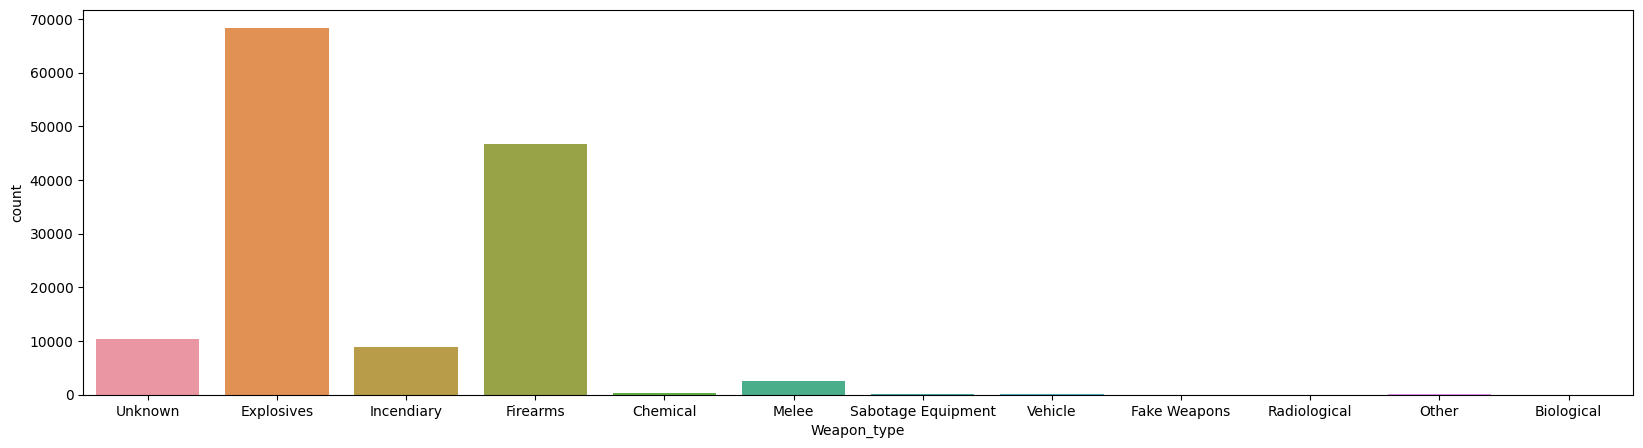

In [112]:
plt.figure(figsize=(20,5));
sns.countplot(x=df.Weapon_type);

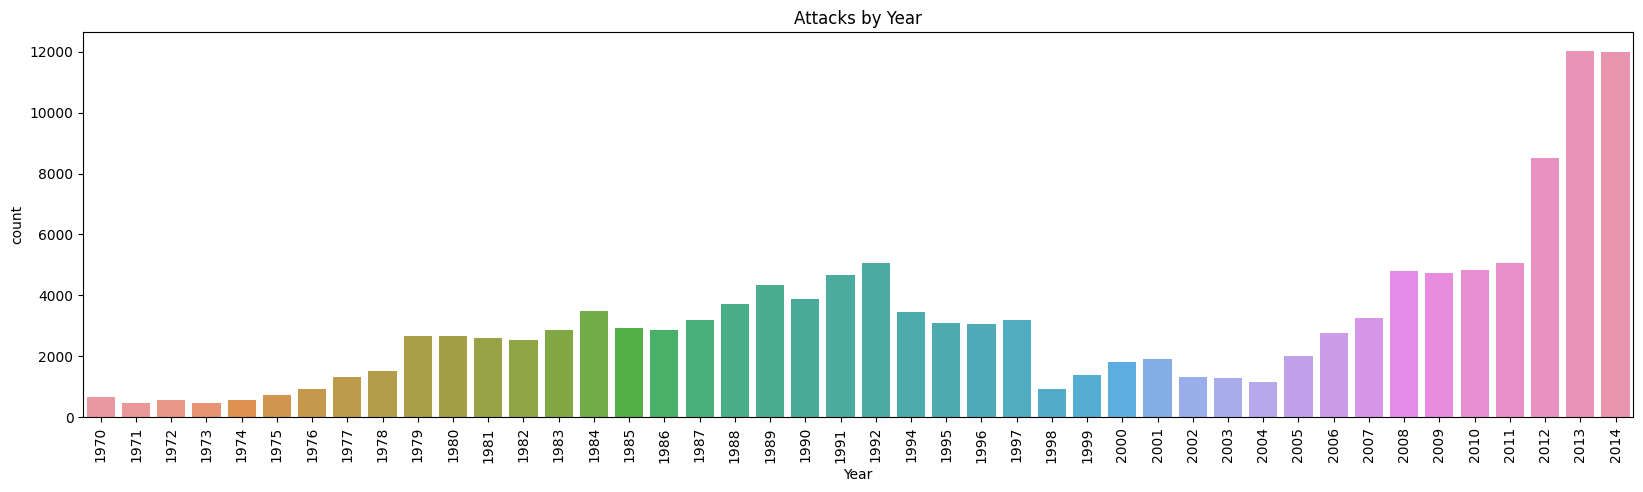

In [128]:
plt.figure(figsize=(20,5));
plt.xticks(rotation = 90)
plt.title('Attacks by Year')
sns.countplot(x=df.Year);

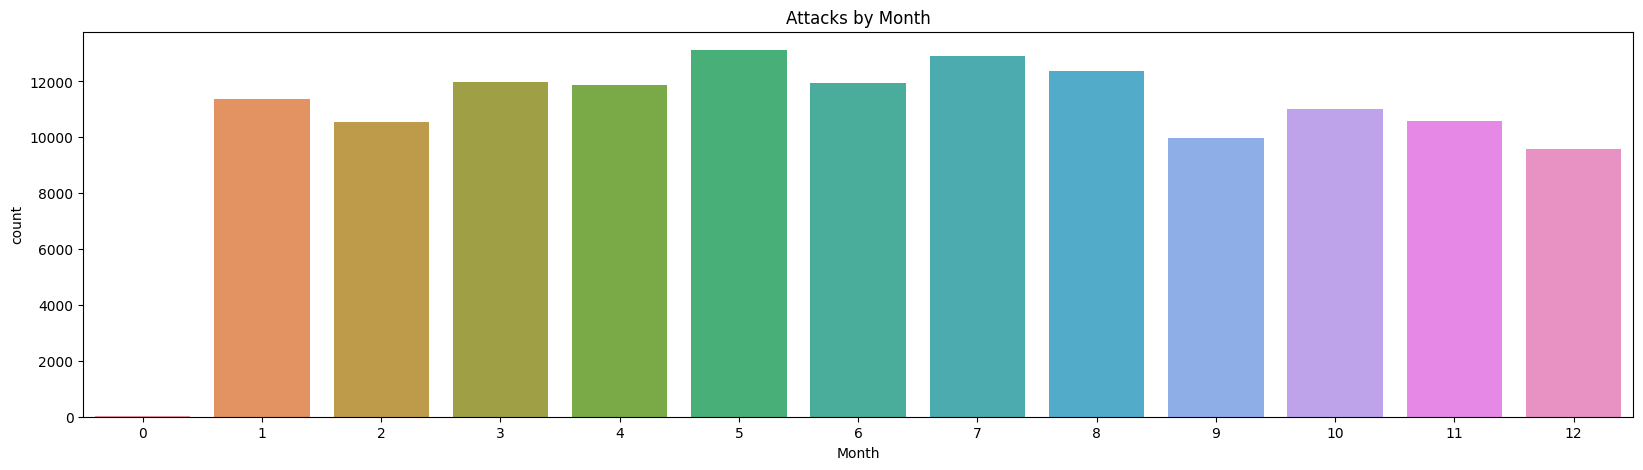

In [129]:
plt.figure(figsize=(20,5));
plt.title('Attacks by Month')
sns.countplot(x=df.Month);

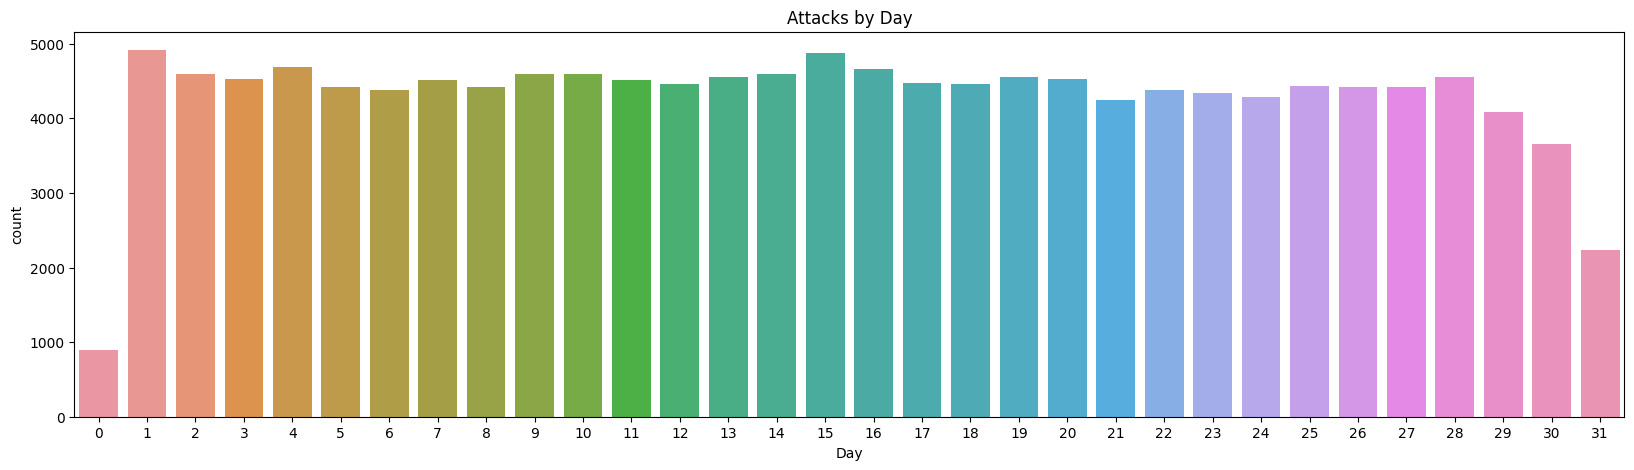

In [130]:
plt.figure(figsize=(20,5));
plt.title('Attacks by Day')
sns.countplot(x=df.Day);

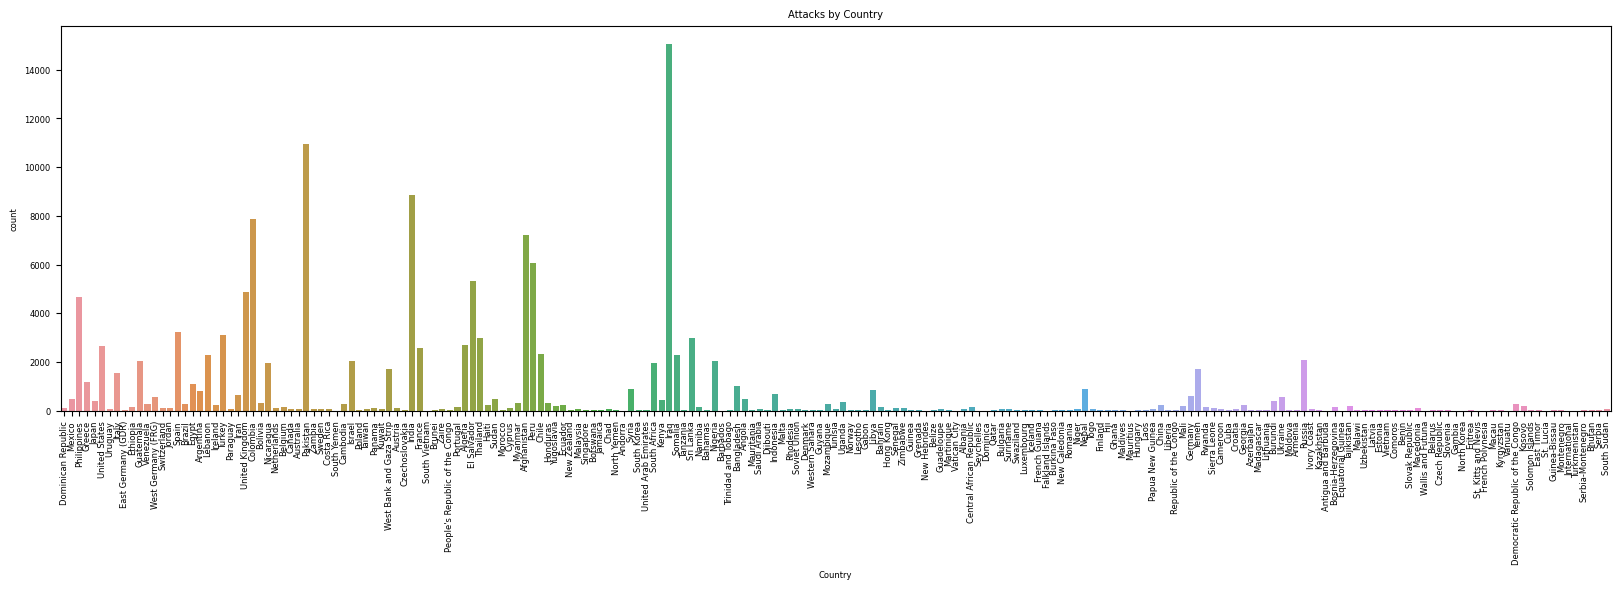

In [134]:
plt.figure(figsize=(20,5))
plt.rcParams.update({'font.size':6});
plt.xticks(rotation = 90)
plt.title('Attacks by Country')
sns.countplot(x=df.Country);

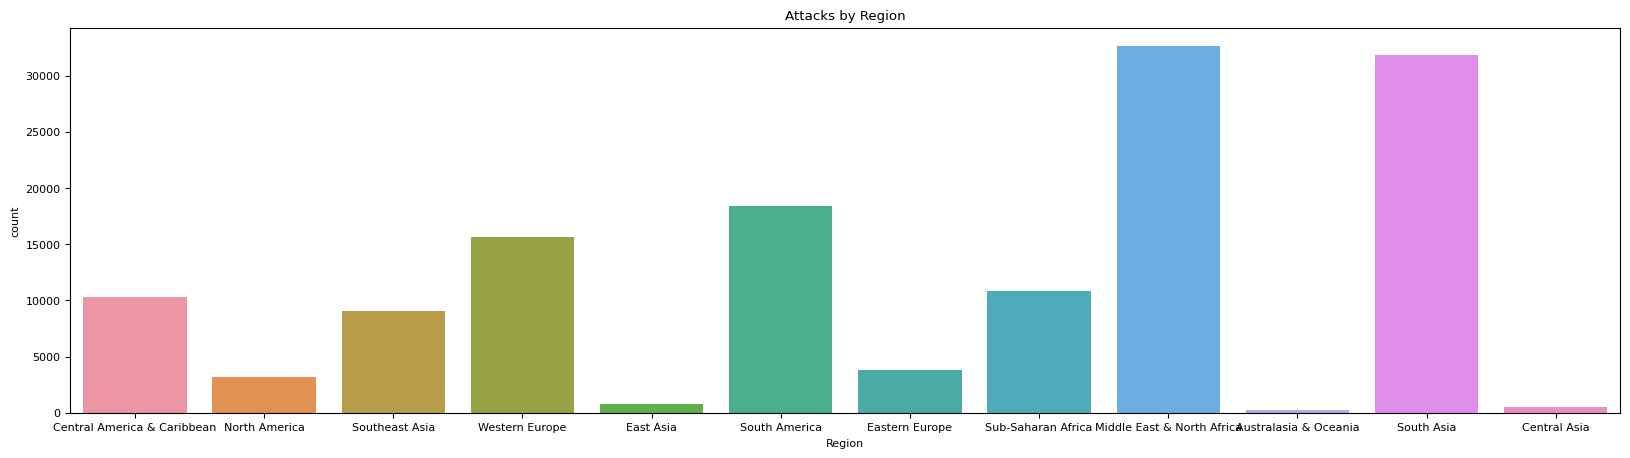

In [140]:
plt.figure(figsize=(20,5))
plt.rcParams.update({'font.size':8});
plt.xticks(rotation = 0)
plt.title('Attacks by Region')
sns.countplot(x=df.Region);

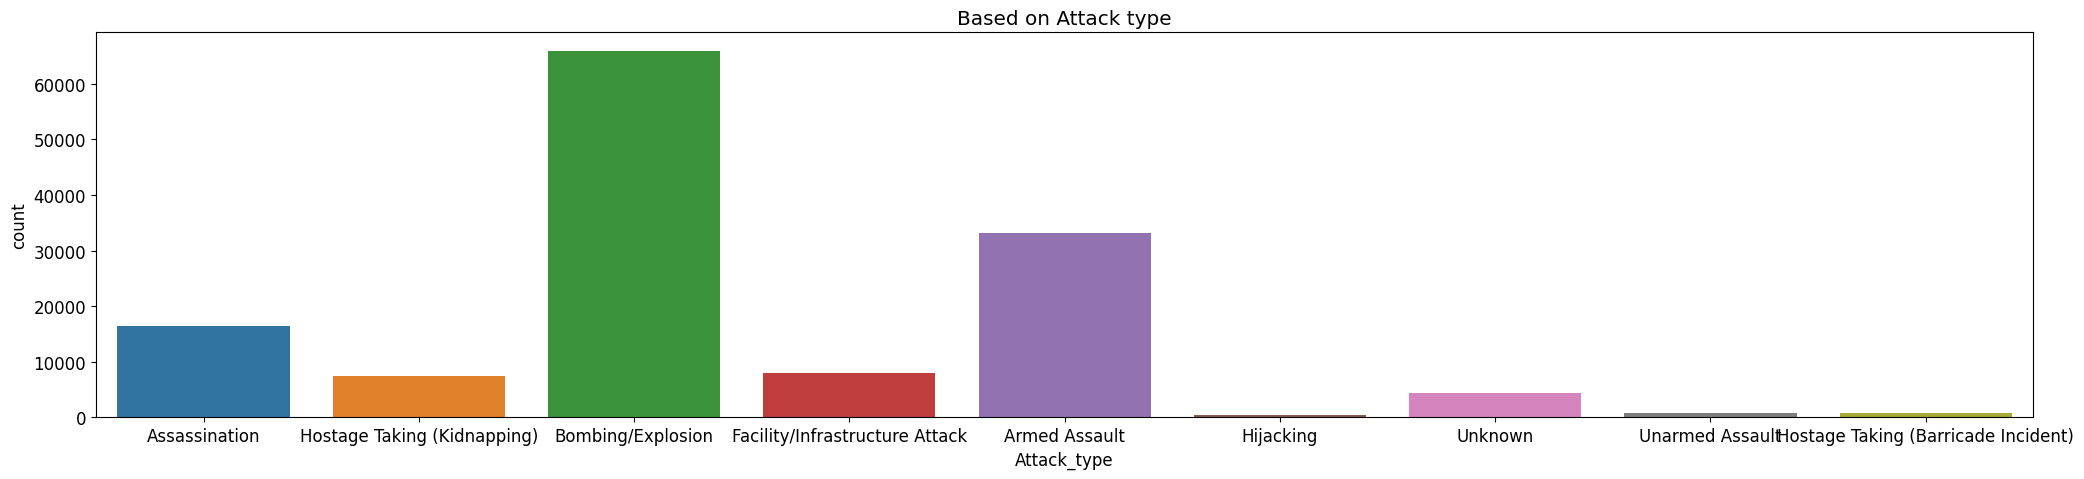

In [142]:
plt.figure(figsize=(25,5));
plt.rcParams.update({'font.size':12});
plt.xticks(rotation = 0)
plt.title('Based on Attack type')
sns.countplot(x=df.Attack_type);